### This code snippet demonstrates the usage of Pandas, Matplotlib, and Seaborn libraries for data analysis and visualization.

Required Packages:
- pandas: a powerful data manipulation and analysis library
- matplotlib: a plotting library for creating static, animated, and interactive visualizations
- seaborn: a data visualization library built on top of Matplotlib, providing high-level interface for drawing attractive and informative statistical graphics

Usage:
1. Import the necessary libraries: pandas, matplotlib, and seaborn.
2. Load the data into a Pandas DataFrame using pd.read_csv(), pd.read_excel(), or any other applicable method.
3. Perform data analysis and manipulation using Pandas functions and methods.
4. Create visualizations using Matplotlib and Seaborn functions.
5. Customize the plots as needed using the available options and parameters.
6. Display the plots using plt.show().

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The data from the "Login_Data.csv" file is read and stored in a pandas DataFrame object named 'df'.

The pd.read_csv() function is called with the file path ./Login_Data.csv as an argument. The function reads the CSV file and converts it into a pandas DataFrame. The resulting DataFrame is then assigned to the variable df.

The purpose of this code is to load the data from the CSV file into a DataFrame for further data manipulation, analysis, or processing using pandas.

In [8]:
df = pd.read_csv("./Login_Data.csv")

The head() method is commonly used in data analysis and exploratory data analysis (EDA) tasks to obtain an overview of the data before performing further analysis or processing. It is particularly useful when dealing with large datasets, as it provides a concise summary of the DataFrame content.

In [9]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False


### This code snippet provides a visual representation of the top 10 users with the highest number of login attempts. It helps in identifying the most active users based on login activity.

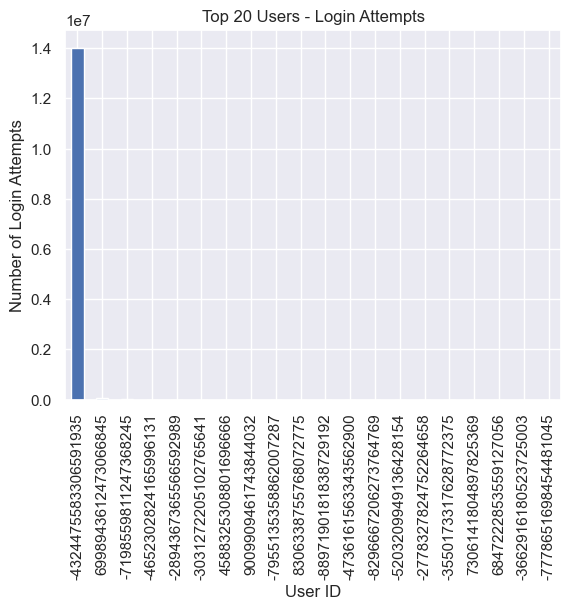

In [10]:
login_attempts = df['User ID'].value_counts()
top_10_users = login_attempts.head(20)
sns.set(style='darkgrid')
top_10_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Login Attempts')
plt.title('Top 20 Users - Login Attempts')
plt.show()


### In this code, 2 new column named 'NumSuccessfulLogins' and 'NumUnuccessfulLogins' are added to the DataFrame df. The values in this column represent the total number of successful logins and total number of unsuccessful logins for each user respectivly.

In [11]:
df['NumSuccessfulLogins'] = df.groupby('User ID')['Login Successful'].transform('sum')

In [12]:
# Grouping the data by "User ID" and counting the number of False values in "Login Successful"
false_counts = df[df['Login Successful'] == False].groupby('User ID').size().reset_index(name='NumUnsuccessfulLogins')

# Merging the false_counts DataFrame with the original data
df = df.merge(false_counts, on='User ID', how='left')

# Imputating NaN values in the new column with 0
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].fillna(0)

# Converting the values in the "False Count" column to integers
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].astype(int)

In [13]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False,4,14025895
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,4,14025895
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True,19,1
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False,1,2


### This code snippet filters and extracts data for a specific User ID, creates a bar graph to represent the login statistics, annotates the bars with their values, and displays the graph for analysis. It uses the extracted values of successful and unsuccessful logins as the data for the graph.

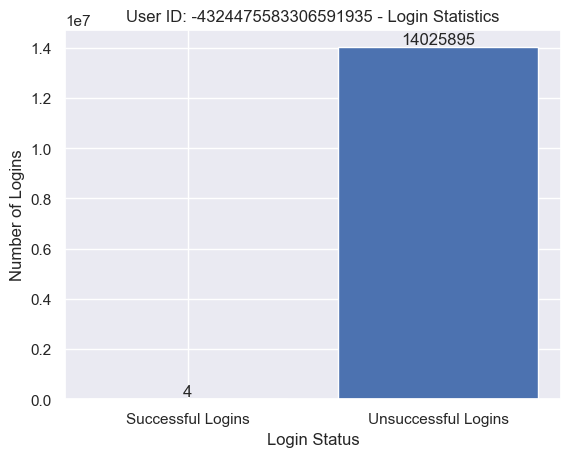

In [14]:
# Filter data for the specific User ID
sns.set(style='darkgrid')
user_id = -4324475583306591935
user_data = df[df['User ID'] == user_id]

# Getting the first row for the User ID
row_data = user_data.iloc[0]

# Filtering NumSuccessfulLogins and NumUnsuccessfulLogins
num_successful_logins = row_data['NumSuccessfulLogins']
num_unsuccessful_logins = row_data['NumUnsuccessfulLogins']

# Graph
labels = ['Successful Logins', 'Unsuccessful Logins']
values = [num_successful_logins, num_unsuccessful_logins]

plt.bar(labels, values)
plt.xlabel('Login Status')
plt.ylabel('Number of Logins')
plt.title(f'User ID: {user_id} - Login Statistics')

# Texting the vakue the bars with values
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### This code snippet aims to identify the user with the highest frequency of occurrences in the dataset. It calculates the most occurring user ID by counting the occurrences of each unique user ID and selecting the index (user ID) with the maximum count. The code then filters the dataset to include only the rows corresponding to this most occurring user. This allows for further analysis and examination of the specific login patterns and characteristics associated with this particular user.

In [15]:
most_occuring_user = df['User ID'].value_counts().idxmax()

# Filtering the dataset to include only the rows for the most occurring user
df = df[df['User ID'] == most_occuring_user]

# Print the dataset
df

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False,4,14025895
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,4,14025895
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895
5,2020-02-03 12:44:05.160,-4324475583306591935,209.236.123.126,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895
13,2020-02-03 12:44:26.828,-4324475583306591935,46.212.51.170,NO,Viken,Klofta,Chrome 86.0.4240.378,desktop,False,4,14025895
...,...,...,...,...,...,...,...,...,...,...,...
31269256,2021-02-28 23:59:41.580,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895
31269259,2021-02-28 23:59:47.766,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895
31269260,2021-02-28 23:59:49.956,-4324475583306591935,170.39.79.123,US,-,-,Chrome Mobile WebView 80.0.3987,mobile,False,4,14025895
31269261,2021-02-28 23:59:54.233,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895


### This code snippet uses the Python `re` module to extract the browser category from the "Browser Name and Version" column in the dataframe. 

### It applies a lambda function to each value in the column, using a regular expression pattern (`r'^\D+'`) to match and extract the non-digit characters at the beginning of each string. If a match is found, the extracted category is assigned to the corresponding row in the "Browser Category" column; otherwise, an empty string is assigned. This step allows for categorizing the browsers based on their names and versions, providing a simplified representation for further analysis.

In [18]:
import re
df['Browser Category'] = df['Browser Name and Version'].apply(lambda x: re.search(r'^\D+', x).group() if re.search(r'^\D+', x) else '')
# df = df.drop(['Browser Name and Version'], axis=1)

In [20]:
df

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False,4,14025895,Firefox
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,4,14025895,Chrome Mobile
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895,Chrome Mobile WebView
5,2020-02-03 12:44:05.160,-4324475583306591935,209.236.123.126,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895,Chrome Mobile WebView
13,2020-02-03 12:44:26.828,-4324475583306591935,46.212.51.170,NO,Viken,Klofta,Chrome 86.0.4240.378,desktop,False,4,14025895,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...
31269256,2021-02-28 23:59:41.580,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot
31269259,2021-02-28 23:59:47.766,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot
31269260,2021-02-28 23:59:49.956,-4324475583306591935,170.39.79.123,US,-,-,Chrome Mobile WebView 80.0.3987,mobile,False,4,14025895,Chrome Mobile WebView
31269261,2021-02-28 23:59:54.233,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot


### This code snippet calculates the counts of each browser category present in the "Browser Category" column of the dataframe and selects the top 10 categories. 

### It then creates a pie chart using the `plt.pie()` function, where each category is represented as a slice of the pie. The `labels` parameter assigns the category names to the corresponding slices, and the `autopct` parameter formats the percentage values displayed on the chart. The `plt.axis('equal')` line ensures that the pie is drawn as a circle. Finally, the chart is displayed with the `plt.show()` function.

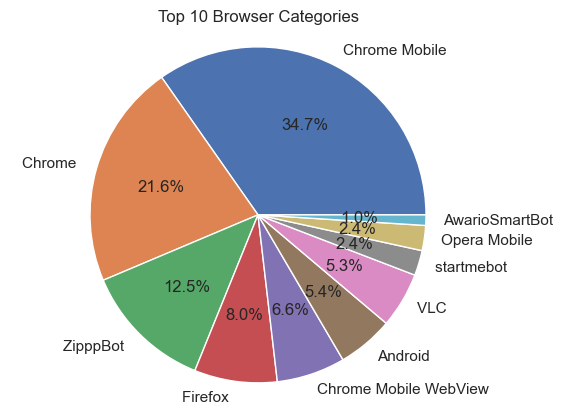

In [33]:
# Getting the counts of each browser category
browser_category_counts = df['Browser Category'].value_counts().head(10)

# Create the pie chart
plt.pie(browser_category_counts, labels=browser_category_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 10 Browser Categories')

# The chart
plt.show()

### This code snippet calculates the counts of each device type present in the "Device Type" column of the dataframe. It then creates a pie chart using the `plt.pie()` function, where each device type is represented as a slice of the pie.

### The `labels` parameter assigns the device type names to the corresponding slices, and the `autopct` parameter formats the percentage values displayed on the chart. The `plt.title()` function sets the title of the chart. 

### The chart is displayed with the `plt.show()` function. The code also includes commented-out code to define custom colors for the pie chart, which can be used by uncommenting and modifying the `colors` list.

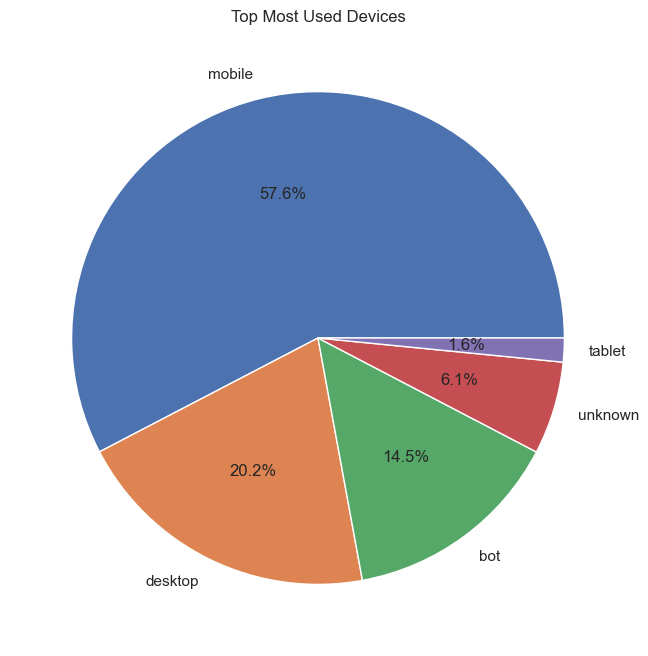

In [32]:
device_counts = df['Device Type'].value_counts()

# Define custom light colors for the pie chart
# colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']


# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%')
plt.title('Top Most Used Devices')
plt.show()

### The provided code calculates the total number of successful logins for each country by grouping the dataframe based on the "Country" column and summing the corresponding "NumSuccessfulLogins" values. 

### The top 10 countries with the highest login counts are then selected using the `nlargest()` function. A bar graph is created using `plt.bar()` to visualize the number of logins for each country. The x-axis represents the countries, and the y-axis represents the number of logins. 

### The x-axis labels are rotated for better readability using `plt.xticks(rotation=45)`. Finally, the graph is displayed using `plt.show()`.

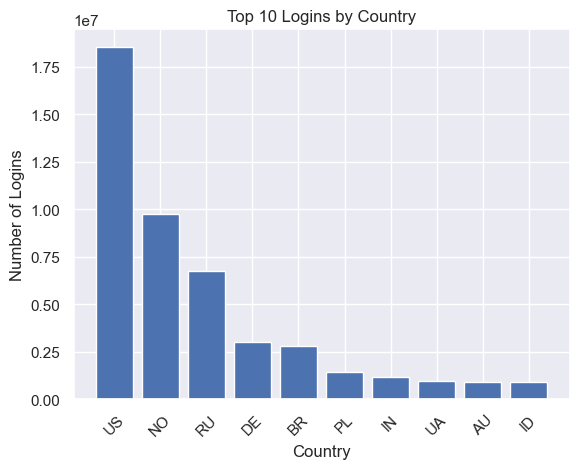

In [34]:
country_logins = df.groupby('Country')['NumSuccessfulLogins'].sum()

# Select the top 10 countries with the highest login counts
top_10_countries = country_logins.nlargest(10)

# Create the bar graph
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Logins')
plt.title('Top 10 Logins by Country')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the graph
plt.show()


### This code performs several operations on the dataframe. 
### First, it converts the 'Login Timestamp' column to a datetime format using the `pd.to_datetime()` function. 
### Then, it sorts the data in ascending order based

In [41]:
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Sorting the data by 'Login Timestamp' within each user
df.sort_values(['User ID', 'Login Timestamp'], inplace=True)

# Calculating the login time difference until the next attempt for each user
df['Time Difference'] = df.groupby('User ID')['Login Timestamp'].diff()

# Replacing NaT values with 0 for users with only one attempt
df['Time Difference'] = df['Time Difference'].fillna(pd.Timedelta(seconds=0))

In [42]:
df

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category,Time Difference
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False,4,14025895,Chrome Mobile,0 days 00:00:00
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895,Chrome Mobile WebView,0 days 00:00:12.631000
5,2020-02-03 12:44:05.160,-4324475583306591935,209.236.123.126,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False,4,14025895,Chrome Mobile WebView,0 days 00:00:08.980000
13,2020-02-03 12:44:26.828,-4324475583306591935,46.212.51.170,NO,Viken,Klofta,Chrome 86.0.4240.378,desktop,False,4,14025895,Chrome,0 days 00:00:21.668000
14,2020-02-03 12:44:29.221,-4324475583306591935,10.0.67.86,NO,Troms og Finnmark,Bjornevatn,Android 2.3.3.2672,mobile,False,4,14025895,Android,0 days 00:00:02.393000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31269256,2021-02-28 23:59:41.580,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot,0 days 00:00:04.287000
31269259,2021-02-28 23:59:47.766,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot,0 days 00:00:06.186000
31269260,2021-02-28 23:59:49.956,-4324475583306591935,170.39.79.123,US,-,-,Chrome Mobile WebView 80.0.3987,mobile,False,4,14025895,Chrome Mobile WebView,0 days 00:00:02.190000
31269261,2021-02-28 23:59:54.233,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot,0 days 00:00:04.277000


### The line `df['Time Difference'] = pd.to_timedelta(df['Time Difference']).dt.total_seconds()` converts the 'Time Difference' column in the dataframe from a timedelta format to the total number of seconds. 

### By applying the `pd.to_timedelta()` function, the values in the column are converted to timedelta objects representing the duration between login attempts. Then, the `.dt.total_seconds()` method is used to calculate the total duration in seconds for each timedelta value, and the resulting values are assigned back to the 'Time Difference' column in the dataframe.

In [ ]:
df['Time Difference'] = pd.to_timedelta(df['Time Difference']).dt.total_seconds()

In [45]:
df.tail()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category,Time Difference
31269256,2021-02-28 23:59:41.580,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot,4.287
31269259,2021-02-28 23:59:47.766,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot,6.186
31269260,2021-02-28 23:59:49.956,-4324475583306591935,170.39.79.123,US,-,-,Chrome Mobile WebView 80.0.3987,mobile,False,4,14025895,Chrome Mobile WebView,2.190
31269261,2021-02-28 23:59:54.233,-4324475583306591935,170.39.78.106,US,-,-,AwarioSmartBot 1.0,unknown,False,4,14025895,AwarioSmartBot,4.277
31269262,2021-02-28 23:59:56.343,-4324475583306591935,10.3.205.188,RU,St.-Petersburg,St Petersburg,ZipppBot 0.11,bot,False,4,14025895,ZipppBot,2.110


### The line df['Time Difference'] = pd.to_timedelta(df['Time Difference'], unit='s') converts the values in the 'Time Difference' column from seconds (previously calculated as total seconds) to a timedelta format using the pd.to_timedelta() function. The unit='s' argument specifies that the values should be interpreted as seconds.

### The next line, df_sorted = df[df['Time Difference'] > pd.Timedelta(0)].sort_values('Time Difference').head(20), creates a new dataframe df_sorted by filtering the original dataframe df to include only the rows where the 'Time Difference' is greater than 0 seconds, indicating valid time differences between login attempts. Then, the filtered dataframe is sorted in ascending order based on the 'Time Difference' column, and only the first 20 rows are selected using the head(20) method.

### The resulting df_sorted dataframe contains the top 20 rows with the smallest time differences between login attempts, ensuring that the time difference is greater than 0 seconds.

In [62]:
df_sorted = df[df['Time Difference'] > pd.Timedelta(0)].sort_values('Time Difference').head(20)


In [63]:
df_sorted


,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,NumSuccessfulLogins,NumUnsuccessfulLogins,Browser Category,Time Difference,Timestamp
28849248,2021-01-29 07:55:19.094,-4324475583306591935,23.137.224.173,US,-,-,Chrome Mobile 51.0.2704,mobile,False,4,14025895,Chrome Mobile,0 days 00:00:00.001000,2021-01-29 07:55:19.094
17866789,2020-10-08 14:26:20.697,-4324475583306591935,213.205.109.136,FR,-,-,Chrome 69.0.3497.17.22,desktop,False,4,14025895,Chrome,0 days 00:00:00.001000,2020-10-08 14:26:20.697
9042331,2020-06-08 07:24:40.845,-4324475583306591935,81.167.143.35,NO,Innlandet,Brumunddal,Chrome 67.0.3396,desktop,False,4,14025895,Chrome,0 days 00:00:00.001000,2020-06-08 07:24:40.845
9208122,2020-06-10 10:43:46.558,-4324475583306591935,10.0.181.180,IT,-,-,Chrome 84.0.4147.338.339,desktop,False,4,14025895,Chrome,0 days 00:00:00.001000,2020-06-10 10:43:46.558
2425824,2020-03-06 15:01:28.475,-4324475583306591935,170.39.78.40,US,-,-,Firefox 20.0.0.1681,mobile,False,4,14025895,Firefox,0 days 00:00:00.001000,2020-03-06 15:01:28.475
4479628,2020-04-04 08:47:53.417,-4324475583306591935,95.164.130.95,US,Wyoming,Cheyenne,Chrome 73.0.3654,desktop,False,4,14025895,Chrome,0 days 00:00:00.001000,2020-04-04 08:47:53.417
12309590,2020-07-22 15:33:02.573,-4324475583306591935,213.205.109.136,FR,-,-,Chrome 69.0.3497.17.20,desktop,False,4,14025895,Chrome,0 days 00:00:00.001000,2020-07-22 15:33:02.573
3322508,2020-03-19 17:16:43.480,-4324475583306591935,10.0.181.201,AT,-,-,Chrome 84.0.4147.338.339,desktop,False,4,14025895,Chrome,0 days 00:00:00.001000,2020-03-19 17:16:43.480
21323501,2020-11-20 09:48:47.581,-4324475583306591935,10.3.205.169,RU,St.-Petersburg,St Petersburg,ZipppBot 0.11,bot,False,4,14025895,ZipppBot,0 days 00:00:00.001000,2020-11-20 09:48:47.581
686636,2020-02-12 12:58:57.522,-4324475583306591935,185.19.116.136,PL,Łódź Voivodeship,Radomsko,Android 2.2.2,mobile,False,4,14025895,Android,0 days 00:00:00.001000,2020-02-12 12:58:57.522
